<a href="https://colab.research.google.com/github/sagarpatiler/machine_learning/blob/main/Banks_1_loan_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn import svm
from sklearn.metrics import accuracy_score

## Data collection and Processing

In [ ]:
# loading the dataset to pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/datasets/loan prediction.csv')

In [ ]:
data.shape

(614, 13)

In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# number of missing values in each column
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# dropping the missing values
data=data.dropna()

In [ ]:
# number of missing values in each column
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# label encoding
data.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
data['Loan_Status']

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

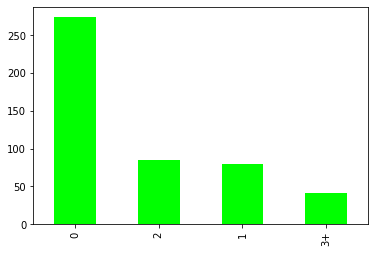

In [ ]:
# Dependent column values
data['Dependents'].value_counts().plot(kind='bar',color='lime')

In [ ]:
# replacing the value of 3+ to 4
data.replace({'Dependents':{'3+':4}},inplace=True)

In [ ]:
data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

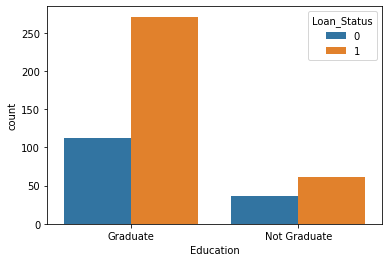

In [ ]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=data)

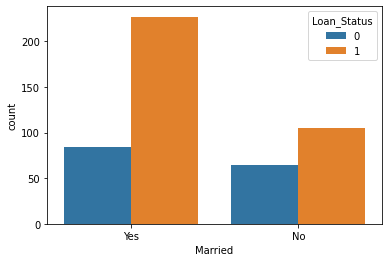

In [ ]:
# marital status & Loan Status
sns.countplot(data=data,x='Married',hue='Loan_Status')
plt.show()

In [ ]:
# convert categorical columns to numerical values
data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


## Separating the data and label

In [ ]:
X =data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = data['Loan_Status']

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [ ]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

## Train Test Split

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(480,) (432,) (48,)


In [ ]:
X_train.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [ ]:
X_train['Dependents']=X_train['Dependents'].astype(str).astype(int)

In [ ]:
X_test['Dependents']=X_test['Dependents'].astype(str).astype(int)

In [ ]:
X_train.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

## Training the model:

1. xgboost

In [ ]:
params = {"colsample_bytree":[0.5, 0.75, 1],
          "max_depth":[3,6,12],
          "learning_rate":[0.3, 0.1, 0.03],
          "n_estimators":[5,10]}

In [ ]:
model = xgb.XGBClassifier()


In [ ]:
model_g = GridSearchCV(model,param_grid=params,cv=3,scoring="accuracy")

In [ ]:
X_train.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [ ]:
model_g.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.5, 0.75, 1],
                         'learning_rate': [0.3, 0.1, 0.03],
                         'max_depth': [3, 6, 12], 'n_estimators': [5, 10]},
             scoring='accuracy')

In [ ]:
print(model_g.best_params_)

{'colsample_bytree': 0.75, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 5}


In [ ]:
model_g.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__base_score': 0.5,
 'estimator__booster': 'gbtree',
 'estimator__colsample_bylevel': 1,
 'estimator__colsample_bynode': 1,
 'estimator__colsample_bytree': 1,
 'estimator__gamma': 0,
 'estimator__learning_rate': 0.1,
 'estimator__max_delta_step': 0,
 'estimator__max_depth': 3,
 'estimator__min_child_weight': 1,
 'estimator__missing': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': 1,
 'estimator__nthread': None,
 'estimator__objective': 'binary:logistic',
 'estimator__random_state': 0,
 'estimator__reg_alpha': 0,
 'estimator__reg_lambda': 1,
 'estimator__scale_pos_weight': 1,
 'estimator__seed': None,
 'estimator__silent': None,
 'estimator__subsample': 1,
 'estimator__verbosity': 1,
 'estimator': XGBClassifier(),
 'n_jobs': None,
 'param_grid': {'colsample_bytree': [0.5, 0.75, 1],
  'max_depth': [3, 6, 12],
  'learning_rate': [0.3, 0.1, 0.03],
  'n_estimators': [5, 10]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_

In [ ]:
model_final=model = xgb.XGBClassifier(colsample_bytree= 0.75, learning_rate= 0.03, max_depth= 3, n_estimators= 5)

In [ ]:
model_final.fit(X_train,Y_train)

XGBClassifier(colsample_bytree=0.75, learning_rate=0.03, n_estimators=5)

## Model Evaluation

In [ ]:
# accuracy score on training data
X_train_prediction = model_final.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8148148148148148


In [ ]:
# accuracy score on testin data
X_test_prediction = model_final.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8333333333333334


## making system



P.S  -As xgboost algorithm is not that much compatible with pandas dataframe,we have to comvert it to numpy arrays and train again the final model to get our system working




In [ ]:
X_numpy = X_train.to_numpy()
Y_numpy= Y_train.to_numpy()

In [ ]:
model_final.fit(X_numpy,Y_numpy)

XGBClassifier(colsample_bytree=0.75, learning_rate=0.03, n_estimators=5)

In [ ]:
# accuracy score on training data again with NUMPY array
X_train_prediction = model_final.predict(X_numpy)
training_data_accuracy = accuracy_score(Y_numpy,X_train_prediction)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8148148148148148


In [ ]:
inputs=[1,1,2,1,0,12000,5000,1000,300,1,1]

In [ ]:
arr=np.array(inputs)

In [ ]:
predictions=model_final.predict([arr])
if predictions==1:
  print('loan status is YES')
else:
  print('loan status is NO')


loan status is YES


## saving model

In [ ]:
import pickle

In [ ]:
pickle.dump(model_final,open('loan.pkl','wb'))